# Phase 4 Code Challenge Review



TOC:

  - [Time Series](#ts)  

  - [Clustering](#clust)
    

<a id='ts'></a>

# Time Series

In [1]:
import pandas as pd
import numpy as np

In [3]:
ap = pd.read_csv('data/AirPassengers.csv')
ap

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


With the data above, what is the first step in transforming it into data suitable for our time series models?

> Changing month to datetime

In [6]:
# Perform that step in code
ap['Month'] = pd.to_datetime(ap['Month'])
ap.set_index(keys = 'Month', drop = True, inplace = True)

What types of trends might we expect to find in our time series datasets?

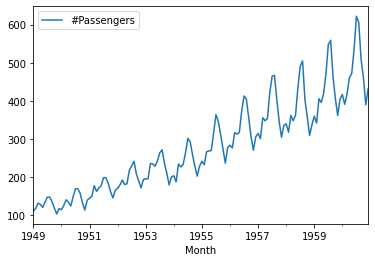

In [24]:
# plot the time series
ap.plot();

What type of trends do you see in the above plot?

> Upward trend, seasonality

> rolling mean will increase. Variance changes. The seasonality gets larger over time.

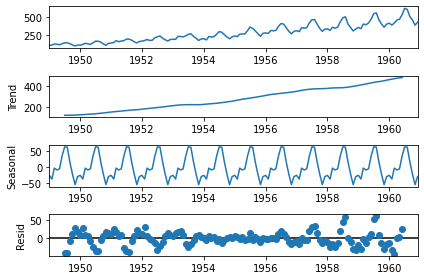

In [13]:
# Add to the plot to visualize trends by looking at summary statistics across a window of time.
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(ap, model = 'additive').plot();

What are some ways to remove those trends? 

> taking the log or sqrt. Taking first difference, seasonal difference, or both

> - log for exponential growth
> - growth but not quite exponential, sqrt

> differences are for trends

What is the goal of removing those trends?

> Stationarity, mean variance autocorrelation stable over time

> Removing these, you get to a point where you just predict things in the future the same as they have in the past

How can we diagnose whether we have successfully removed the trends?

> Dickey-Fuller test

> Can plot out and look at mean/variance over time

Use the Augmented Dickey Fuller test to see if the detrended data is ready for modeling

In [15]:
# your code here
from statsmodels.tsa.stattools import adfuller

adfuller(ap, autolag='AIC')

(0.8153688792060569,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

How can ACF/PACF plots below help us pick our model coefficients?

Autocorrelation. There will be a strong correlation for temperature between each day. Today, yesterday's temperatures correlation would probably be somewhere in the range of .9. But two weeks ago, probably not as strong of a correlation

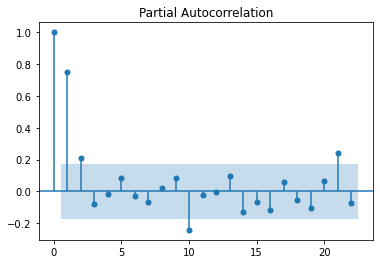

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ap.diff(12).dropna());

> PACF. Contitional correlation. amount of correlation between variable and lag itself not explained by correlation at all lower-order-lags. The ones that poke out you would pick. 
> shaded area is confidence interval.

>So this accounts for correlation that we would expect to see between points. So you would want to add 2 AR terms because of the graph is stating that.

Below, you're seeing correlation between days. each point is a day. point where x is 10, that is 10 days away from the point. If corre between 1-2 is .9. that will be present going on through the points when they're just 1 away.

Is there correlation between T0 and T-4 once you already account for the expected correlation? That's the main question you want to answer. So if 0 - 1 is .9. Then 0 - 2 is .81. Because .9*.9 as you move along the points. .729 is 0-3. The correlation between existing points is cascading down while accounting for the correlation that you would expect. That is what the PACF does

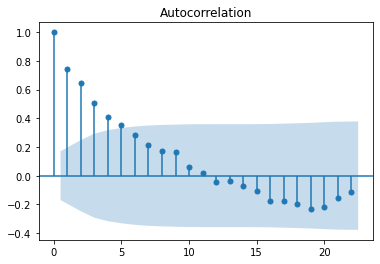

In [27]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ap.diff(12).dropna());

> The ACF shows a strong persistent correlation, evidence that a first difference should be taken to remove this autocorrelation. Generally ACF to predict MA terms. 

Let's look at another dataset with a smaller time unit.

In [18]:
aq = pd.read_csv('data/AirQualityUCI.csv', delimiter=';')
aq.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [19]:
# Explain what this gnarly bit of code doing? 
aq['date_time'] = pd.to_datetime(aq['Date'] + ' ' + aq['Time'], format='%d/%m/%Y %H.%M.%S')
aq.set_index('date_time', inplace=True)

Which of the features are possible candidates for time series modeling?

> All numericals?

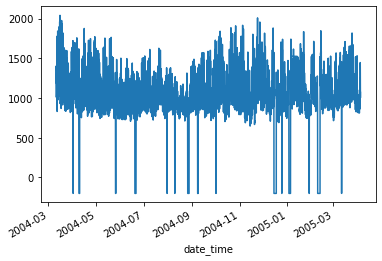

In [20]:
aq['PT08.S1(CO)'].plot();

What's going on here? Reference the [docs](https://archive.ics.uci.edu/ml/datasets/Air+Quality)

> The recorded value for the sensor dropped below zero. Could have been sensor malfunction

In [122]:

aq_replaced = np.where(aq['PT08.S1(CO)'] ==-200, np.nan, aq['PT08.S1(CO)'])
aq_replaced = pd.Series(aq_replaced, index=aq.index)

What techniques do we have to fill the nan's in our data?

In [ ]:
one_random_student(quanggang)

Use one of the techniques mentioned above to fill the data.

In [ ]:
# Your code here

In [ ]:
one_random_student(quanggang)

Let's look at the daily levels of PT08.S1(CO)

In [ ]:
# Your code here

In [ ]:
one_random_student(quanggang)

Plot the pacf and acf's for the resampled data.  Use it to identify the AR/MA components.

In [ ]:
# Your code here

In [ ]:
one_random_student(quanggang)

<a id='pca'></a>

<a id='clust'></a>

# Clustering

Question: What is the difference between supervised and unsupervised learning?

> Supervised learning has labels, while unsupervised does not.

Describe how the KMeans algorithm works.

Be sure to mention initialization and how it updates.


> You randomly assign k# of centroids. Then assign all observations to their nearest centroid. Then move centroid to be at center of those groups. Then you recalculate the distance from the observations to the centroids and reassign observations and move the centroids again.

> You keep doing this until centroids don't move. A lot of data points it can just jump back and forth towards the end.

How does KMeans know how many clusters to make?

> You tell it.

How does KMeans assess the best clusters?  Look at the doc-string if you need to.

> Elbow method, silhouette coefficient

> However, could be business constraint as well. Like wine recommendations. If 3 was best by kmeans, you might break it down into more because, for the business problem, ten would play better in marketing.

In [133]:
from sklearn.cluster import KMeans

KMeans()

KMeans()

## Agglomerative Clustering

In [134]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering()


Describe how Heirarchical Agglomerative Clustering works.

Be sure to mention how it inititializes, and how clusters are formed.

> 2 put together, that's repeated. distance between them observed. Dendrogram.

> Hierarchical it's bottom up. Kmeans, centroids and then fits to data. Hier is other way.

What are linkages? Explain how the default linakage works in the model. 

> Your answer here

How does heirarchical aglomerative clustering decide how many clusters to make?

> You can also visualize them. Maybe determine numbers based on that

> Different types of linkages to determine distance between clusters

What metrics do we have to score the clusters which are formed?

> Your answer here

Describe the difference between them.

> Your answer here

Let's code together. For the iris dataset loaded below, implement a heirarchical agglomerative clusterer with the appropriate fitting technique with a simple train-test-split.

Choose the appropriate ammount of clusters based on an appropriate metric. 

Bonus: Use PCA to visualize in two dimensions the cluster groups of the best metric.

In [136]:
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])
y = data['target']